<a href="https://colab.research.google.com/github/Aicoaching2025/Investment-Banking/blob/main/Financial_Projections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-7151f45de086>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2022-01-01", periods=n_months, freq='M')


Historical Average Burn Rate: $475,452.55
Historical Runway: 10.5 months
Forecasted Average Burn Rate: $814,786.45
Projected Runway: 6.1 months


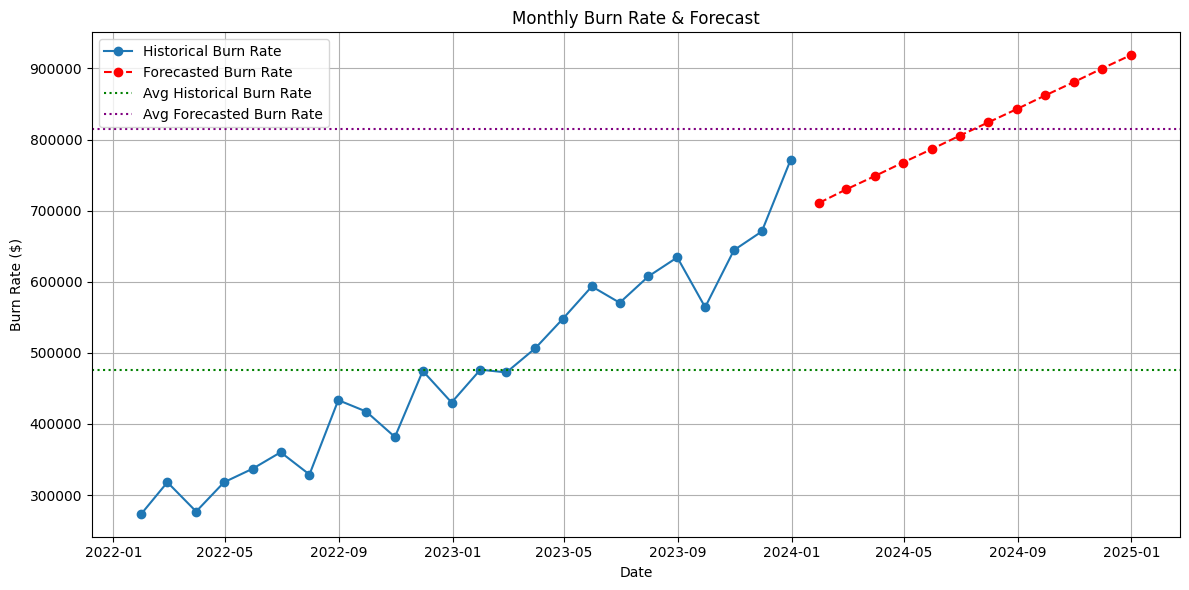


Actionable Insights & Recommendations:

1. **Historical Financial Health:**  
   - The company's average monthly burn rate is approximately $475,452.55.
   - With current cash reserves of $5,000,000, the historical runway is about 10.5 months.

2. **Trend Analysis:**  
   - The linear regression model indicates that the burn rate is increasing over the past 24 months.
   - Forecasting suggests an average future burn rate of $814,786.45, projecting a runway of roughly 6.1 months.

3. **Strategic Capital Allocation:**  
   - **Cost Optimization:** Target high-expense areas to reduce burn rate. Initiate cost-reduction strategies where expenses significantly exceed revenue.
   - **Revenue Enhancement:** Invest in initiatives that drive revenue growth to counterbalance rising expenses.

4. **Risk Management & Planning:**  
   - Plan for additional funding rounds well before cash reserves are depleted.
   - Continuously monitor the burn rate and update forecasts with new data to adjust stra

In [3]:

### financial_projections.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# ----------------------------
# Step 1: Generate Synthetic Financial Data
# ----------------------------

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of historical months and create date range
n_months = 24  # 24 months of historical data
dates = pd.date_range(start="2022-01-01", periods=n_months, freq='M')

# Generate synthetic Revenue:
# Base revenue of $300,000 with a 2% monthly growth plus some random noise
base_revenue = 300000
growth_rate_revenue = 0.02
revenue = [
    base_revenue * (1 + growth_rate_revenue)**i + np.random.normal(0, 20000)
    for i in range(n_months)
]

# Generate synthetic Expenses:
# Base expenses of $600,000 with a 3% monthly growth plus some random noise
base_expenses = 600000
growth_rate_expenses = 0.03
expenses = [
    base_expenses * (1 + growth_rate_expenses)**i + np.random.normal(0, 30000)
    for i in range(n_months)
]

# Calculate Monthly Burn Rate as Expenses minus Revenue
burn_rate = [exp - rev for rev, exp in zip(revenue, expenses)]

# Create a DataFrame to store the data
data = pd.DataFrame({
    'Date': dates,
    'Revenue': revenue,
    'Expenses': expenses,
    'BurnRate': burn_rate
})
data.set_index('Date', inplace=True)

# ----------------------------
# Step 2: Calculate Historical Runway
# ----------------------------

# Define the current cash reserve
initial_cash = 5000000  # $5,000,000 in cash reserves

# Calculate the average historical burn rate
avg_burn_rate = np.mean(burn_rate)

# Calculate the historical runway (in months)
runway = initial_cash / avg_burn_rate

# Print the historical burn rate and runway
print("Historical Average Burn Rate: ${:,.2f}".format(avg_burn_rate))
print("Historical Runway: {:.1f} months".format(runway))

# ----------------------------
# Step 3: Forecast Future Burn Rate Using Linear Regression
# ----------------------------

# Prepare the historical data for regression:
# Use month indices (0, 1, ..., n_months-1) as the predictor variable
X_hist = np.arange(n_months).reshape(-1, 1)
y_hist = np.array(burn_rate).reshape(-1, 1)

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_hist, y_hist)

# Determine the trend based on the coefficient (slope)
slope = model.coef_[0][0]
trend = "increasing" if slope > 0 else "decreasing"

# Forecast burn rate for the next 12 months
n_forecast = 12
X_future = np.arange(n_months, n_months + n_forecast).reshape(-1, 1)
burn_forecast = model.predict(X_future).flatten()

# Calculate forecasted average burn rate and runway projection
avg_burn_forecast = np.mean(burn_forecast)
runway_forecast = initial_cash / avg_burn_forecast

# Print forecasted burn rate and runway
print("Forecasted Average Burn Rate: ${:,.2f}".format(avg_burn_forecast))
print("Projected Runway: {:.1f} months".format(runway_forecast))

# ----------------------------
# Step 4: Visualize Historical & Forecasted Burn Rates
# ----------------------------

# Create a plot to visualize the burn rate trend
plt.figure(figsize=(12, 6))

# Plot historical burn rate data
plt.plot(data.index, data['BurnRate'], marker='o', label='Historical Burn Rate')

# Create future dates for forecasted data
future_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1),
                             periods=n_forecast, freq='ME')
# Plot forecasted burn rate data with a dashed line
plt.plot(future_dates, burn_forecast, marker='o', linestyle='--', color='red', label='Forecasted Burn Rate')

# Plot horizontal lines for historical and forecasted average burn rates
plt.axhline(avg_burn_rate, color='green', linestyle=':', label='Avg Historical Burn Rate')
plt.axhline(avg_burn_forecast, color='purple', linestyle=':', label='Avg Forecasted Burn Rate')

# Add title and axis labels
plt.title("Monthly Burn Rate & Forecast")
plt.xlabel("Date")
plt.ylabel("Burn Rate ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

# ----------------------------
# Step 5: Output Actionable Insights for C-Level Executives
# ----------------------------

insights = f"""
Actionable Insights & Recommendations:

1. **Historical Financial Health:**
   - The company's average monthly burn rate is approximately ${avg_burn_rate:,.2f}.
   - With current cash reserves of ${initial_cash:,.0f}, the historical runway is about {runway:.1f} months.

2. **Trend Analysis:**
   - The linear regression model indicates that the burn rate is {trend} over the past 24 months.
   - Forecasting suggests an average future burn rate of ${avg_burn_forecast:,.2f}, projecting a runway of roughly {runway_forecast:.1f} months.

3. **Strategic Capital Allocation:**
   - **Cost Optimization:** Target high-expense areas to reduce burn rate. Initiate cost-reduction strategies where expenses significantly exceed revenue.
   - **Revenue Enhancement:** Invest in initiatives that drive revenue growth to counterbalance rising expenses.

4. **Risk Management & Planning:**
   - Plan for additional funding rounds well before cash reserves are depleted.
   - Continuously monitor the burn rate and update forecasts with new data to adjust strategies in real time.

5. **Next Steps:**
   - Validate these projections with actual financial data as it becomes available.
   - Consider more advanced forecasting techniques (e.g., time series analysis) for finer granularity.
   - Integrate this model into a real-time dashboard for continuous financial monitoring.
"""

# Print actionable insights
print(insights)
